# Imports and Defaults

In [ ]:
import os

import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
posterior = "eight_schools-eight_schools_noncentered" # modify as needed
num_params = 10 # modify as needed

sns.set_style("darkgrid")
fig_path = os.path.join("../figures", posterior)

# Load Dataframe

In [ ]:
samples_path = os.path.join("../data/processed/", posterior, "samples.parquet")
samples = pl.read_parquet(samples_path)
samples

# All Model Parameters with Preliminary Summary Statistics

### 1. Accuracy Evaluation

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_p{i}" for i in range(num_params)]
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").mean().alias("mean"),
        pl.col("value").std().alias("std_dev"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler").sort("mean")
print("plotting")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="mean",
    error_y="std_dev",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    height=1800,
    range_y=[-2, 2],
    category_orders={
        "variable_right": [f"mean_p{i}" for i in range(num_params)],
        "sampler_type": ["ghmc", "drhmc", "drghmc", "nuts", "ref"]
    },
)

# fig.for_each_yaxis(lambda y: y.update(showticklabels=True, matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True, matches=None))
fig.show()

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").mean().alias("mean"),
        pl.col("value").std().alias("std_dev"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler").sort("mean")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="mean",
    error_y="std_dev",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    range_y=[-50, 50],
    height=1800,
    category_orders={
        "variable_right": [f"mean_squared_p{i}" for i in range(num_params)],
        "sampler_type": ["ghmc", "drhmc", "drghmc", "nuts", "ref"]
    },
)

# fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True, matches=None))
fig.show()

### Side-Plots:

In [ ]:
# old code for transforming my dataframe


# ss_cols = [f"mean_p{i}" for i in range(num_params)]
# config_cols = ["sampler", "chain", "sampler_type", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "grad_evals"]
# sampler_cols = ["sampler", "sampler_type", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic",]

# means = samples.group_by("sampler").agg(
#     pl.col(ss_cols).mean()
# )
# means = means.rename({f"mean_p{i}": f"means_p{i}" for i in range(num_params)})


# std = samples.group_by("sampler").agg(
#     pl.col(ss_cols).std(),
# )
# std = std.rename({f"mean_p{i}": f"std_p{i}" for i in range(num_params)})

# grad_evals = samples.group_by("sampler").agg(
#     pl.col("grad_evals").mean(),
# )

# # extract columns from samples dataframe that are in config_cols
# configs = samples.select(sampler_cols).unique()

# summary_stats = configs.join(means, on="sampler").join(std, on="sampler").join(grad_evals, on="sampler")

# summary_stats

In [ ]:
# id_vars are every column except the value_vars
value_vars = [f"mean_p{i}" for i in range(num_params)]
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
print(samples_melted.head())

fig = px.box(
    data_frame=samples_melted.to_pandas(),
    x="sampler",
    y="value",
    color="sampler_type",
    facet_col="variable",
    facet_col_wrap=5,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "chain"],
    height=700,
    notched=True,
)

# do not share any y axes between the subplots
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.show()

In [ ]:
# id_vars are every column except the value_vars
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
print(samples_melted.head())

fig = px.box(
    data_frame=samples_melted.to_pandas(),
    x="sampler",
    y="value",
    color="sampler_type",
    facet_col="variable",
    facet_col_wrap=5,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic",],
    height=700,
    notched=True,
    boxmode="overlay",
)

# do not share any y axes between the subplots
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.show()

In [ ]:
# id_vars are every column except the value_vars
value_vars = "grad_evals"
id_vars = [col for col in samples.columns if col not in value_vars]

samples_melted = samples.melt(id_vars=id_vars, value_vars=value_vars)
print(samples_melted.head())

fig = px.box(
    data_frame=samples_melted.to_pandas(),
    x="sampler",
    y="value",
    color="sampler_type",
    facet_col="variable",
    facet_col_wrap=5,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic"],
    height=700,
    notched=False,
    log_y=True,
    boxmode="overlay",
)

# do not share any y axes between the subplots
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.show()

# All Model Parameters with Transformed Summary Statistics

### 1. Accuracy Evaluation

In [ ]:
# non-parameter cols
non_parameter_cols = [
    "sampler",
    "chain",
    "sampler_type",
    "init_stepsize",
    "reduction_factor",
    "steps",
    "dampening",
    "num_proposals",
    "probabilistic",
    "grad_evals",
]

# convert to pandas dataframe
samples_pd = samples.to_pandas()

# first get the ref row
ref = samples_pd[samples_pd["sampler_type"] == "ref"]

# remove the ref row from grouped_samplers
samples_pd = samples_pd[samples_pd["sampler_type"] != "ref"]

# then drop the non-parameter cols
ref = ref.drop(non_parameter_cols, axis=1)

# Identify common columns
common_cols = ref.columns.intersection(samples_pd.columns)

ref = ref.mean(axis=0)

# Perform subtraction only on common columns
for col in common_cols:
    samples_pd[col] = samples_pd[col].sub(ref[col]).pow(2)

squared_error = pl.from_pandas(samples_pd)

squared_error

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_p{i}" for i in range(num_params)]
id_vars = [col for col in squared_error.columns if col not in value_vars]

samples_melted = squared_error.melt(id_vars=id_vars, value_vars=value_vars)

grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").median().alias("median"),
        pl.col("value").quantile(0.75).alias("pi_plus"),
        pl.col("value").quantile(0.25).alias("pi_minus"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler")
df = df.sort("median")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="median",
    error_y="pi_plus",
    error_y_minus="pi_minus",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    # range_y=[-1, 1],
    height=1800,
    log_y=True,
    category_orders={
        "variable_right": [f"mean_p{i}" for i in range(num_params)],
        "sampler_type": ["ghmc", "drhmc", "drghmc", "nuts"]
    },
    labels={
        "median": "squared error"
    },
    title="Accuracy of Parameters<br><sup>Squared Error between Estimated Parameters and True Parameters</sup>"
)

fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True,matches=None))
fig.show()

/mnt/home/gturok/mambaforge/envs/drghmc/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning:

The figure layout has changed to tight



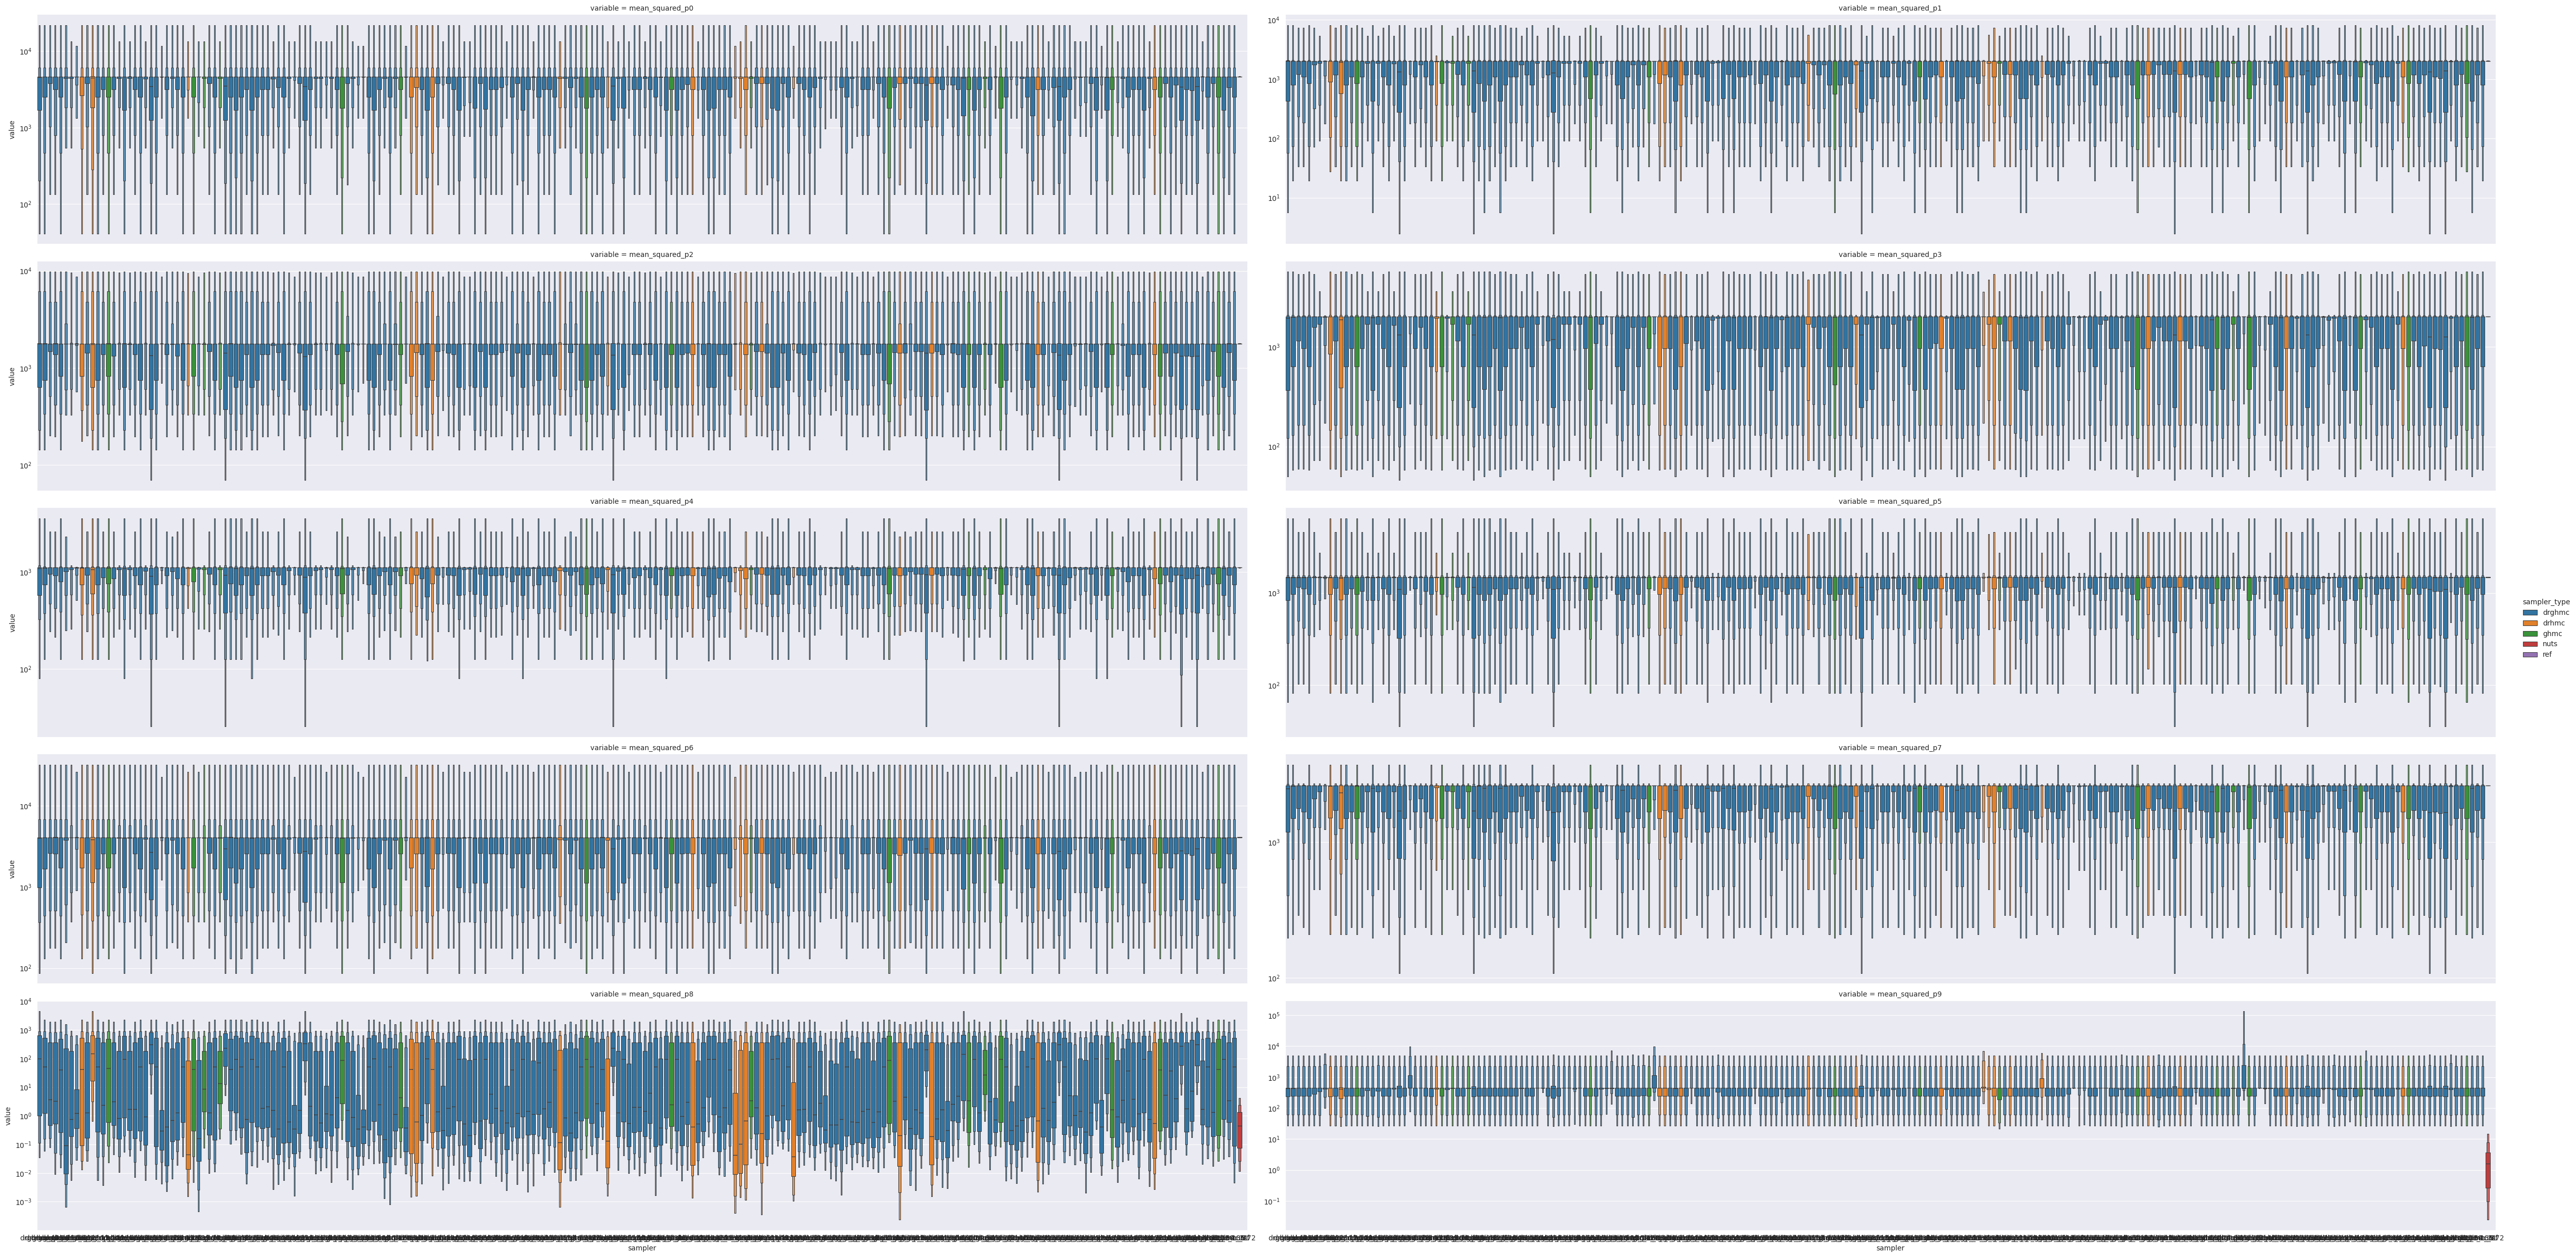

In [13]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in squared_error.columns if col not in value_vars]

samples_melted = squared_error.melt(id_vars=id_vars, value_vars=value_vars)

### point plot ###
# fig = sns.catplot(
#     kind="point",
#     data=samples_melted.to_pandas(),
#     x="sampler",
#     y="value",
#     hue="sampler_type",
#     estimator="median",
#     errorbar=("pi", 75),
#     seed=1234,
#     col="variable",
#     col_wrap=2,
#     sharey=False,
#     sharex=True,
#     log_scale=True,
#     aspect=5,
#     col_order=[f"mean_squared_p{i}" for i in range(num_params)],
#     linestyle="none",
# )

### boxen plot ###
fig = sns.catplot(
    kind="boxen",
    data=samples_melted.to_pandas(),
    x="sampler",
    y="value",
    hue="sampler_type",
    col="variable",
    col_wrap=2,
    log_scale=True,
    sharey=False,
    aspect=5,
    showfliers=False,
)

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in squared_error.columns if col not in value_vars]

samples_melted = squared_error.melt(id_vars=id_vars, value_vars=value_vars)

grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").median().alias("median"),
        pl.col("value").quantile(0.75).alias("pi_plus"),
        pl.col("value").quantile(0.25).alias("pi_minus"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler")
df = df.sort("median")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="median",
    error_y="pi_plus",
    error_y_minus="pi_minus",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    # range_y=[-5, 5],
    height=1800,
    log_y=True,
    category_orders={
        "variable_right": [f"mean_squared_p{i}" for i in range(num_params)],
        "sampler_type": ["ghmc", "drhmc", "drghmc", "nuts"]
    },
    labels={
        "median": "squared error"
    },
    title="Accuracy of Parameters Squared<br><sup>Squared Error between Estimated Parameters Squared and True Parameters Squared</sup>"
)

fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True,matches=None))
fig.show()

### 2. Efficiency Evaluation

In [ ]:
# non-parameter cols
non_parameter_cols = [
    "sampler",
    "chain",
    "sampler_type",
    "init_stepsize",
    "reduction_factor",
    "steps",
    "dampening",
    "num_proposals",
    "probabilistic",
    "grad_evals",
]

# convert to pandas dataframe
samples_pd = samples.to_pandas()

# first get the ref row
ref = samples_pd[samples_pd["sampler_type"] == "ref"]

# remove the ref row from grouped_samplers
samples_pd = samples_pd[samples_pd["sampler_type"] != "ref"]

# then drop the non-parameter cols
ref = ref.drop(non_parameter_cols, axis=1)

# Identify common columns
common_cols = ref.columns.intersection(samples_pd.columns)

ref = ref.mean(axis=0)

# Perform subtraction only on common columns
for col in common_cols:
    squared_std = samples_pd[col].var()
    squared_error = samples_pd[col].sub(ref[col]).pow(2)
    ess = squared_std / squared_error
    samples_pd[col] = ess / samples_pd["grad_evals"]

ess_df = pl.from_pandas(samples_pd)

ess_df.head()

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_p{i}" for i in range(num_params)]
id_vars = [col for col in ess_df.columns if col not in value_vars]

samples_melted = ess_df.melt(id_vars=id_vars, value_vars=value_vars)

grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").mean().alias("mean"),
        pl.col("value").std().alias("std_dev"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler").sort("mean")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="mean",
    error_y="std_dev",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    hover_data=["std_dev"],
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    range_y=[-500, 500],
    height=1500,
    labels={"mean": "ESS / grad evals"},
    category_orders={
        "variable_right": [f"mean_p{i}" for i in range(num_params)],
        # "sampler": df.sort("mean")["sampler"].to_list(),
    },
)

fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True,matches=None))
fig.show()

In [ ]:
# group by sampler, then compute the mean and standard deviation
value_vars = [f"mean_squared_p{i}" for i in range(num_params)]
id_vars = [col for col in ess_df.columns if col not in value_vars]

samples_melted = ess_df.melt(id_vars=id_vars, value_vars=value_vars)

grouped_df = samples_melted.group_by(["sampler", "variable"]).agg(
    [
        pl.col("value").mean().alias("mean"),
        pl.col("value").std().alias("std_dev"),
    ]
)

df = samples_melted.join(grouped_df, on="sampler").sort("mean")

fig = px.scatter(
    data_frame=df.to_pandas(),
    x="sampler",
    y="mean",
    error_y="std_dev",
    color="sampler_type",
    facet_col="variable_right",
    facet_col_wrap=2,
    hover_data=["std_dev"],
    # hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic", "std_dev"],
    range_y=[-1500, 1500],
    height=1500,
    labels={"mean": "ESS / grad evals"},
    category_orders={
        "variable_right": [f"mean_squared_p{i}" for i in range(num_params)],
        # "sampler": df.sort("mean")["sampler"].to_list(),
    },
)

# fig.for_each_yaxis(lambda y: y.update(showticklabels=True,matches=None))
fig.for_each_xaxis(lambda x: x.update(showticklabels=True,matches=None))
fig.show()

# Most-Difficult Model Parameter with Transformed Summary Statistics

In [ ]:
samplers_1p = squared_error

# Assuming mean_cols is a list of your column names
mean_cols = [f"mean_p{i}" for i in range(num_params)]

# Compute the maximum across the specified columns
samplers_1p = samplers_1p.with_columns(
    pl.max_horizontal(mean_cols).alias("squared error")
)


# convert to Pandas
samplers_1p = samplers_1p.to_pandas()

# remove unused categories for "sampler_type" column
samplers_1p["sampler_type"] = samplers_1p["sampler_type"].cat.remove_unused_categories()

# convert back to Polars
samplers_1p = pl.from_pandas(samplers_1p)

samplers_1p.head()

In [ ]:
fig = px.scatter(
    data_frame=samplers_1p.to_pandas(),
    x="sampler",
    y="squared error",
    color="sampler_type",
    log_y=True,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic"],
    title=r"Error of Parameters",
)

fig.show()

In [ ]:
samplers_1p = squared_error

# Assuming mean_cols is a list of your column names
mean_cols = [f"mean_squared_p{i}" for i in range(num_params)]

# Compute the maximum across the specified columns
samplers_1p = samplers_1p.with_columns(
    pl.max_horizontal(mean_cols).alias("squared error")
)


# convert to Pandas
samplers_1p = samplers_1p.to_pandas()

# remove unused categories for "sampler_type" column
samplers_1p["sampler_type"] = samplers_1p["sampler_type"].cat.remove_unused_categories()

# convert back to Polars
samplers_1p = pl.from_pandas(samplers_1p)

samplers_1p.head()

In [ ]:
# add latex title to plotly graph

fig = px.scatter(
    data_frame=samplers_1p.to_pandas(),
    x="sampler",
    y="squared error",
    color="sampler_type",
    log_y=True,
    hover_data=["sampler", "init_stepsize", "reduction_factor", "steps", "dampening", "num_proposals", "probabilistic"],
    title=r"Error of Parameters Squared",
)
fig.show()